# **Q1. a. Planned Data Preparation for Retail Sales Dataset**


To prepare the dataset for classification, the following data preparation activities were planned-

- **Understand the Business Goal**: Transform the `AMOUNT` column into a 3-class target variable to match user preference: {Very_Low}, {Low + Medium}, and {High}.
- **Recode Target Variable**: Map `AMOUNT` into `SALES_CLASS` using defined rules or quantiles.
- **Group AGE**: Create categorical `AGE_GROUP` variable: {0–24, 25–34, 35–54, 54+} using `pd.cut()`.



- **Drop Irrelevant Fields**: Remove `ACCTNUM`, `STATECOD`, and identifiers that don't add value.
- **Check for Missing Values**: Use `.isnull().sum()` to identify and address missing values.
- **Normalize Numeric Variables**: Apply `StandardScaler` to numeric features.
- **Encode Categorical Variables**: One-hot encode relevant fields.
- **Partition Dataset**: Split into train and test sets with stratification to maintain class balance.
- **Document Metadata**: Use `.info()` and `.describe()` for structural review.


# **Q1. b. Executing Data Prep and Displaying metadata**

### **Importing necessary Libraries**

In [ ]:
# Install openpyxl
!pip install openpyxl

# Standard libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Colab settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### **Load the dataset**

In [ ]:
# Load Retail Sales data
df = pd.read_excel('/content/Retail_Sales_Data.xlsx')

df.head()


,ACCTNUM,AGE,AMOUNT,EDLEVEL,GENDER,HEAT,HOMEVAL,INCOME,MARITAL,NUMCARS,PURCHASE,STATECOD,TELIND,TMKTORD
0,1011070495,31,High,College,female,Electric,215600.0,56000.0,divorce,2,YES,MA,Yes,0
1,1011148523,25,Medium,College,female,Gas,155500.0,35600.0,married,1,YES,MA,Yes,0
2,1013165012,36,Low,College,male,Fuel Oil,82100.0,33700.0,married,2,YES,ME,Yes,1
3,1013918584,41,High,College,female,Fuel Oil,197200.0,51300.0,single,2,YES,CT,Yes,0
4,1014013369,26,Medium,College,female,Fuel Oil,147800.0,53000.0,married,2,YES,CT,Yes,0


### **Check for Missing Values**

In [ ]:
# Check data types and number of non-null values
df.info()

# Check percentage of missing values
print("\nMissing Values (%):\n")
print(df.isnull().sum() / len(df) * 100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ACCTNUM   1966 non-null   int64  
 1   AGE       1966 non-null   int64  
 2   AMOUNT    1966 non-null   object 
 3   EDLEVEL   1966 non-null   object 
 4   GENDER    1966 non-null   object 
 5   HEAT      1966 non-null   object 
 6   HOMEVAL   1912 non-null   float64
 7   INCOME    1947 non-null   float64
 8   MARITAL   1966 non-null   object 
 9   NUMCARS   1966 non-null   int64  
 10  PURCHASE  1966 non-null   object 
 11  STATECOD  1966 non-null   object 
 12  TELIND    1966 non-null   object 
 13  TMKTORD   1966 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 215.2+ KB

Missing Values (%):

ACCTNUM     0.000000
AGE         0.000000
AMOUNT      0.000000
EDLEVEL     0.000000
GENDER      0.000000
HEAT        0.000000
HOMEVAL     2.746694
INCOME      0.966429
MARITAL     0.0

### **Recode** **Target Variable AMOUNT**

In [ ]:
# Collapse AMOUNT into 3 business-defined categories
df['AMOUNT'] = df['AMOUNT'].replace({
    'Very_Low': 'Low',
    'Low': 'Medium',
    'Medium': 'Medium',
    'High': 'High'
})

# Convert to categorical data type
df['AMOUNT'] = df['AMOUNT'].astype('category')

# Confirm changes
df['AMOUNT'].value_counts()


,count
AMOUNT,
Medium,882
High,590
Low,494


### **Create Market Bracket Bins for AGE**

In [ ]:
# Define age bins and labels for market segments
bins = [0, 24, 34, 54, 120]
labels = ['0-24', '25-34', '35-54', '55+']

# Create new column AGE_GROUP
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

# Convert to category
df['AGE_GROUP'] = df['AGE_GROUP'].astype('category')


df[['AGE', 'AGE_GROUP']].head(10)


,AGE,AGE_GROUP
0,31,25-34
1,25,25-34
2,36,35-54
3,41,35-54
4,26,25-34
5,25,25-34
6,26,25-34
7,36,35-54
8,30,25-34
9,27,25-34


### **Recode MARITAL to Binary (Yes/No)**

In [ ]:
# Recode marital status
df['MARITAL'] = df['MARITAL'].replace({
    'married': 'Yes',
    'divorce': 'No',
    'single': 'No',
    'never married': 'No'
})

# Convert to category
df['MARITAL'] = df['MARITAL'].astype('category')


df['MARITAL'].value_counts()


,count
MARITAL,
Yes,1192
No,579
marriage,86
divorced,61
in marriage,48


### **Normalize and Recode All MARITAL Vairants**

In [ ]:
# Fix case and whitespace issues before mapping
df['MARITAL'] = df['MARITAL'].str.lower().str.strip()

# Re-map again with cleaned values
df['MARITAL'] = df['MARITAL'].replace({
    'married': 'Yes',
    'in marriage': 'Yes',
    'divorced': 'No',
    'divorce': 'No',
    'single': 'No',
    'never married': 'No',
    'marriage': 'Yes'
})

# Convert to category again
df['MARITAL'] = df['MARITAL'].astype('category')


df['MARITAL'].value_counts()


,count
MARITAL,
yes,1192
no,579
Yes,134
No,61


In [ ]:
# Standardize Yes/No capitalization
df['MARITAL'] = df['MARITAL'].str.capitalize()
df['MARITAL'] = df['MARITAL'].astype('category')


df['MARITAL'].value_counts()


,count
MARITAL,
Yes,1326
No,640


### **Convert Other Categorical Columns**

In [ ]:
# Define all categorical columns for consistent formatting
categorical_cols = ['EDLEVEL', 'GENDER', 'HEAT', 'MARITAL', 'STATECOD', 'TELIND', 'PURCHASE', 'AMOUNT', 'AGE_GROUP']

# Convert to category type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Confirm a few
df[categorical_cols].dtypes


,0
EDLEVEL,category
GENDER,category
HEAT,category
MARITAL,category
STATECOD,category
TELIND,category
PURCHASE,category
AMOUNT,category
AGE_GROUP,category


### **Drop Irrelevant Columns**

In [ ]:
# Drop columns that do not add predictive value
df.drop(columns=['ACCTNUM', 'STATECOD'], inplace=True)


### **One-Hot Encode Categorical Variables**

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


### **Standardize Numeric Variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply standardization
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


### **Train-Test Split with Reconstructed Target (AMOUNT_TARGET)**


In [ ]:
# Reconstruct target from one-hot encoded columns
def reconstruct_target(row):
    if row['AMOUNT_Low'] == 1:
        return 'Low'
    elif row['AMOUNT_Medium'] == 1:
        return 'Medium'
    else:
        return 'High'

# Create target variable
df_encoded['AMOUNT_TARGET'] = df_encoded.apply(reconstruct_target, axis=1)

# Define features and target
X = df_encoded.drop(columns=['AMOUNT_Low', 'AMOUNT_Medium', 'AMOUNT_TARGET'])  # Drop all target-related
y = df_encoded['AMOUNT_TARGET']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)




### **Define Metadata function and Display it as well**

In [ ]:
# metadata function
def metadata(df):
    columns_list = list(df.columns)
    type_list = [str(df[col].dtypes) for col in df.columns]
    missing_list = [round(df[col].isnull().sum() / len(df) * 100, 2) for col in df.columns]
    unique_list = [df[col].nunique() for col in df.columns]

    meta = pd.DataFrame({
        'column_name': columns_list,
        'datatype': type_list,
        'missing_percent': missing_list,
        'unique': unique_list
    })

    return meta

# Assign final dataset
Retail_Sales_Input = df.copy()

# Display metadata
metadata(Retail_Sales_Input)


,column_name,datatype,missing_percent,unique
0,AGE,int64,0.00,46
1,AMOUNT,category,0.00,3
2,EDLEVEL,category,0.00,4
3,GENDER,category,0.00,2
4,HEAT,category,0.00,4
5,HOMEVAL,float64,2.75,992
6,INCOME,float64,0.97,466
7,MARITAL,category,0.00,2
8,NUMCARS,int64,0.00,6
9,PURCHASE,category,0.00,1


# **Q2- a. Ensemble Models on Breast Cancer**

### **LOAD AND PREPARE BREAST CANCER DATA**

### **Install and import required libraries**

In [ ]:
# Install necessary packages
!pip install xlrd scikit-learn xgboost scikeras keras tensorflow --quiet


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Load Breast Cancer data
df_bc = pd.read_excel('Breast+Cancer.xls')

# Quick look
df_bc.head()


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,ID,CLUMPTHI,UOFCLSIZ,UOFCLSHA,MARGINAL,SINGLEEP,BARENUCL,BLANDCHR,NORMALNU,MITOSES,CLASS
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


### **Data prep- (drop ID, check balance, clean NA, Split)**

In [ ]:
# Drop ID column (not predictive)
df_bc.drop('ID', axis=1, inplace=True)

# Check for missing values
print("Missing Values:\n", df_bc.isnull().sum())

# Check class distribution
print("\nClass Distribution:\n", df_bc['CLASS'].value_counts())

# Separate features and target
X = df_bc.drop('CLASS', axis=1)
y = df_bc['CLASS']  # CLASS = 2 is the target event

# Normalize features (optional but improves MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Missing Values:
 CLUMPTHI     0
UOFCLSIZ     0
UOFCLSHA     0
MARGINAL     0
SINGLEEP     0
BARENUCL    16
BLANDCHR     0
NORMALNU     0
MITOSES      0
CLASS        0
dtype: int64

Class Distribution:
 CLASS
2    458
4    241
Name: count, dtype: int64


### **Drop Rows with Missing Values**

In [ ]:
# Drop missing values (only 16 rows)
df_bc_clean = df_bc.dropna()

# Redefine X and y with clean data
X = df_bc_clean.drop('CLASS', axis=1)
y = df_bc_clean['CLASS']

# Re-scale
X_scaled = scaler.fit_transform(X)

# Re-split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


# **Ensemble 1- Random Forest Classifier (Entropy)**

### Justification for Random Forest Hyperparameters:
- `n_estimators=100`: A standard and reliable size for bagging that balances accuracy and training time.
- `criterion='entropy'`: Matches instruction to use entropy-based splits.
- `max_depth=None`: Allows full tree growth unless overfitting is observed.
- `random_state=42`: Ensures reproducibility.


In [ ]:
# Ensemble Model 1: Random Forest using entropy
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=5,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.9610


### **Probability Predictions + Lift at 30%**

In [ ]:
# Get probabilities for the positive class (CLASS = 2 is the event)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Create lift dataframe
df_lift_rf = pd.DataFrame({
    'actual': y_test,
    'prob': y_probs_rf
})

# Sort by predicted prob, descending
df_lift_rf.sort_values('prob', ascending=False, inplace=True)
df_lift_rf.reset_index(drop=True, inplace=True)

# Assign deciles (percentile groups)
df_lift_rf['percentile'] = pd.qcut(df_lift_rf.index + 1, 10, labels=False) + 1

# Calculate lift table
lift_table = df_lift_rf.groupby('percentile').apply(
    lambda x: pd.Series({
        'total': len(x),
        'responders': (x['actual'] == 2).sum(),
        'response_rate': (x['actual'] == 2).mean()
    })
).sort_index(ascending=True)

# Calculate cumulative lift at 30%
cumulative = lift_table.cumsum()
cumulative['cum_response_rate'] = cumulative['responders'] / cumulative['total']
lift_at_30_rf = cumulative.loc[3, 'cum_response_rate'] / (df_lift_rf['actual'] == 2).mean()

print(f"Random Forest Lift @ 30%: {lift_at_30_rf:.4f}")


Random Forest Lift @ 30%: 0.0994


<ipython-input-175-44c86cc41899>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lift_table = df_lift_rf.groupby('percentile').apply(


### **Ensemble 1- % Response Chart and Stability Score**

<ipython-input-176-b1e76483ec2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_response.index, y=percent_response.values, palette="Blues_d")


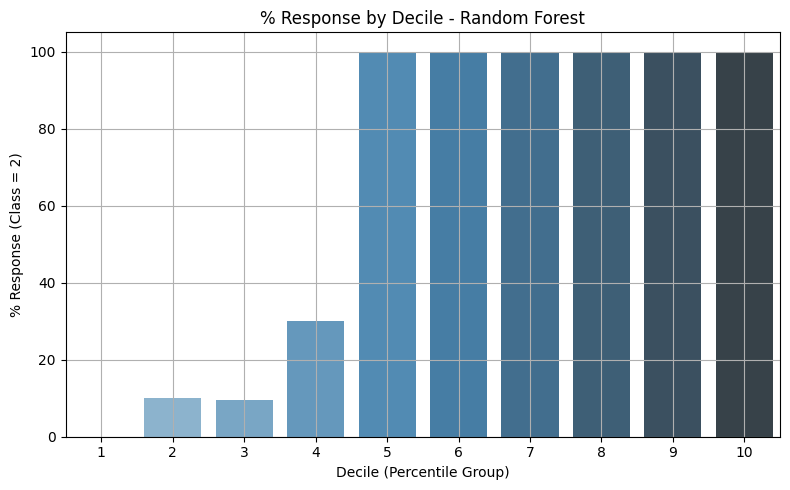

In [ ]:
# Add response flag
df_lift_rf['response'] = df_lift_rf['actual'] == 2

# Calculate % response by decile
percent_response = df_lift_rf.groupby('percentile')['response'].mean() * 100

# Plot the chart
plt.figure(figsize=(8,5))
sns.barplot(x=percent_response.index, y=percent_response.values, palette="Blues_d")
plt.title('% Response by Decile - Random Forest')
plt.xlabel('Decile (Percentile Group)')
plt.ylabel('% Response (Class = 2)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


### **Compute Stability and Overall Score - Random Forest**



In [ ]:
# Compute Stability Score for Random Forest
# Stability = 1 if abs(decile_1 - decile_2) < 5%, else 0

percent_response_rf = df_lift_rf.groupby('percentile')['response'].mean() * 100
stability_rf = 1 if abs(percent_response_rf.loc[1] - percent_response_rf.loc[2]) < 5 else 0
print(f"Stability (Random Forest): {stability_rf}")



Stability (Random Forest): 0


### **Overall Score Random Forest**

In [ ]:
# Compute Overall Score for Random Forest
overall_score_rf = (0.45 * accuracy_rf) + (0.25 * lift_at_30_rf) + (0.30 * stability_rf)

print(f"Overall Score (Random Forest): {overall_score_rf:.4f}")


Overall Score (Random Forest): 0.4573


### **Random Forest Summary**

In [ ]:
print("----- Random Forest Summary -----")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Lift @30%: {lift_at_30_rf:.4f}")
print(f"Stability: {stability_rf}")
print(f"Overall Score: {overall_score_rf:.4f}")


----- Random Forest Summary -----
Accuracy: 0.9610
Lift @30%: 0.0994
Stability: 0
Overall Score: 0.4573


### **Confusion Matrix**

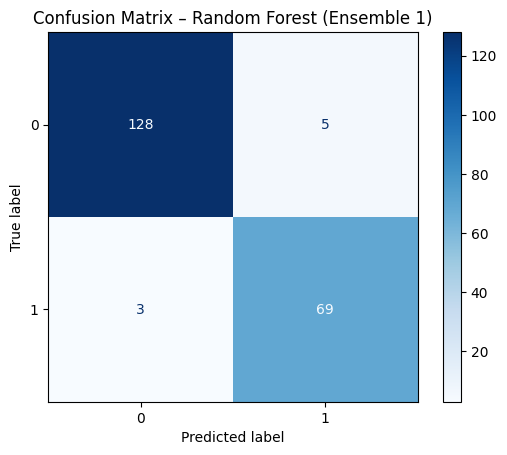

In [ ]:
#  Confusion Matrix for Ensemble 1 – Random Forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reuse existing y_test and y_pred_rf from earlier cells
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix – Random Forest (Ensemble 1)")
plt.grid(False)
plt.show()


# **Ensemble 2- XGBoost Classifier**

### Justification for XGBoost Hyperparameters:
- `n_estimators=100`: Common default for boosting rounds.
- `learning_rate=0.1`: Balances training speed and accuracy.
- `max_depth=3`: Prevents overfitting; aligns with ensemble depth in CE1.
- `use_label_encoder=False`: Required for compatibility.


### **Train and Evaluate XGBoost**

In [ ]:
# Import
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Convert CLASS labels from [2, 4] to [1, 0] (binary encoding for XGBoost)
y_train_xgb = y_train.replace({2: 1, 4: 0})
y_test_xgb = y_test.replace({2: 1, 4: 0})

# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train_xgb)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:16:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9659


### **Generate Lift Chart for XBoost**

In [ ]:
# Get probabilities for class = 1
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Create lift DataFrame
df_lift_xgb = pd.DataFrame({
    'actual': y_test_xgb,
    'prob': y_probs_xgb
}).sort_values('prob', ascending=False).reset_index(drop=True)

# Assign deciles
df_lift_xgb['percentile'] = pd.qcut(df_lift_xgb.index + 1, 10, labels=False) + 1

# Compute lift table
lift_table_xgb = df_lift_xgb.groupby('percentile').apply(
    lambda x: pd.Series({
        'total': len(x),
        'responders': (x['actual'] == 1).sum(),
        'response_rate': (x['actual'] == 1).mean()
    })
).sort_index()

# Compute cumulative lift
cumulative_xgb = lift_table_xgb.cumsum()
cumulative_xgb['cum_response_rate'] = cumulative_xgb['responders'] / cumulative_xgb['total']

# Final Lift at 30% (top 3 deciles)
avg_response_rate = (df_lift_xgb['actual'] == 1).mean()
lift_at_30_xgb = cumulative_xgb.loc[3, 'cum_response_rate'] / avg_response_rate
print(f"XGBoost Lift @ 30%: {lift_at_30_xgb:.4f}")



XGBoost Lift @ 30%: 1.5414


<ipython-input-192-4ce14a3377b7>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lift_table_xgb = df_lift_xgb.groupby('percentile').apply(


### **Plot % Response by Decile for XGBoost**

<ipython-input-193-e10b6722d5c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_response_xgb.index, y=percent_response_xgb.values, palette="Greens_d")


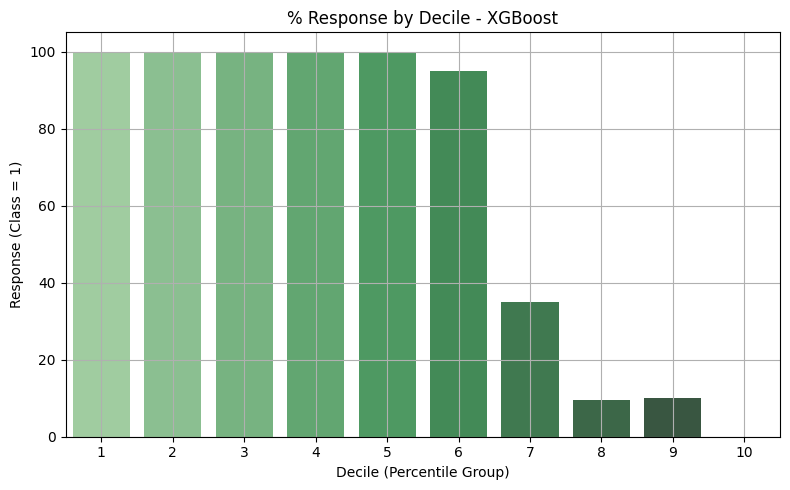

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# % Response by Decile
percent_response_xgb = lift_table_xgb['response_rate'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=percent_response_xgb.index, y=percent_response_xgb.values, palette="Greens_d")
plt.title("% Response by Decile - XGBoost")
plt.xlabel("Decile (Percentile Group)")
plt.ylabel("Response (Class = 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Stability and Final Score - XGBoost**

In [ ]:
#  Stability and Final Score - XGBoost (Insert below your XGBoost bar chart)

# Recalculate % response by decile (needed to access individual values for stability check)
percent_response_xgb = lift_table_xgb['response_rate'] * 100

# Stability logic (compare 2nd and 3rd decile from top 20%)
stability_xgb = 1 if abs(percent_response_xgb.loc[1] - percent_response_xgb.loc[2]) < 5 else 0
print(f"Stability (XGBoost): {stability_xgb}")

# Final Overall Score calculation for XGBoost
# Note: Make sure you already have these defined: accuracy_xgb, lift_at_30_xgb
overall_score_xgb = (0.45 * accuracy_xgb) + (0.25 * lift_at_30_xgb) + (0.30 * stability_xgb)
print(f"Overall Score (XGBoost): {overall_score_xgb:.4f}")


Stability (XGBoost): 1
Overall Score (XGBoost): 1.1200


### **XGBoost Summary**

In [ ]:
#  Summary: XGBoost Evaluation Metrics

print("===== XGBoost Model Summary =====")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Lift@30%: {lift_at_30_xgb:.4f}")
print(f"Stability: {stability_xgb}")
print(f"Overall Score: {overall_score_xgb:.4f}")



===== XGBoost Model Summary =====
Accuracy: 0.9659
Lift@30%: 1.5414
Stability: 1
Overall Score: 1.1200


### **Confusion Matrix**

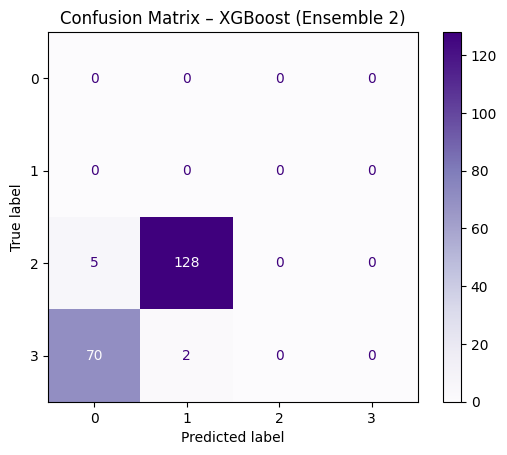

In [ ]:
#  Confusion Matrix for Ensemble 2 – XGBoost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reuse existing y_test and y_pred_xgb
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Purples')
plt.title("Confusion Matrix – XGBoost (Ensemble 2)")
plt.grid(False)
plt.show()


# **Ensemble Model 3- Voting classifier (soft voting)**

### Ensemble Model 3: Voting Classifier – Justification for Base Models
- `DecisionTreeClassifier(max_depth=3, criterion='entropy')`: Lightweight tree for diversity and interpretability.
- `RandomForestClassifier(n_estimators=100)`: Robust and stable ensemble learner.
- `MLPClassifier(hidden_layer_sizes=(20,), max_iter=500)`: Neural network base for non-linear relationships.
Soft voting is used to average predicted class probabilities across models.


### **Import and train Voting Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define base models
clf_dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=500, random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', clf_dt),
    ('rf', clf_rf),
    ('mlp', clf_mlp)
], voting='soft')

# Fit on training data
voting_clf.fit(X_train, y_train)

# Predict on test data
y_pred_vote = voting_clf.predict(X_test)

# Evaluate accuracy
acc_vote = accuracy_score(y_test, y_pred_vote)
print("Voting Classifier Accuracy:", round(acc_vote, 4))

# Confusion matrix (optional)
cm_vote = confusion_matrix(y_test, y_pred_vote)
print("Confusion Matrix:\n", cm_vote)


Voting Classifier Accuracy: 0.9707
Confusion Matrix:
 [[128   5]
 [  1  71]]


### **Lift Table and Visualization**

<ipython-input-203-6d2d3626c50f>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lift_table_vote = df_lift_vote.groupby('percentile').apply(
<ipython-input-203-6d2d3626c50f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_response_vote.index, y=percent_response_vote.values, palette="Oranges_d")


Voting Classifier Lift @ 30%: 0.0752


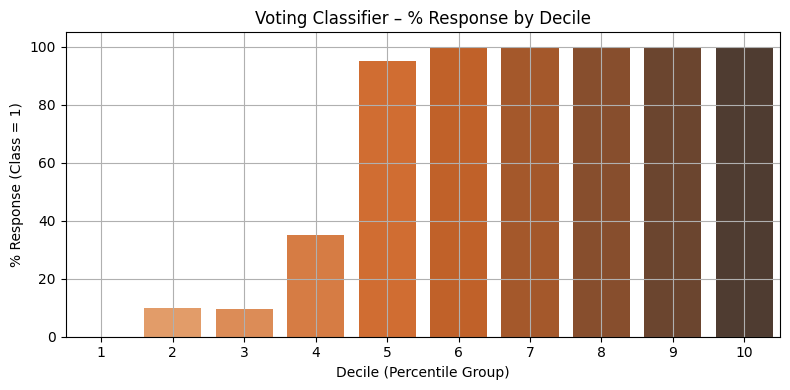

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Convert labels to binary for lift calculation
y_test_vote = y_test.replace({2: 1, 4: 0})  # Only for lift chart logic

# Probabilities for Class = 1
y_prob_vote = voting_clf.predict_proba(X_test)[:, 1]

# Create dataframe for lift
df_lift_vote = pd.DataFrame({'actual': y_test_vote, 'prob': y_prob_vote})
df_lift_vote = df_lift_vote.sort_values(by='prob', ascending=False).reset_index(drop=True)
df_lift_vote['percentile'] = pd.qcut(df_lift_vote.index + 1, 10, labels=False) + 1

# Lift table
lift_table_vote = df_lift_vote.groupby('percentile').apply(
    lambda x: pd.Series({
        'total': len(x),
        'responders': (x['actual'] == 1).sum(),
        'response_rate': (x['actual'] == 1).mean()
    })
).sort_index()

# Cumulative Lift at 30%
lift_table_vote['cumulative_responders'] = lift_table_vote['responders'].cumsum()
lift_table_vote['cumulative_total'] = lift_table_vote['total'].cumsum()
lift_table_vote['cumulative_response_rate'] = lift_table_vote['cumulative_responders'] / lift_table_vote['cumulative_total']

# Safely compute lift @ 30%
avg_response_rate = (y_test_vote == 1).mean()
lift_at_30_vote = lift_table_vote.loc[2, 'cumulative_response_rate'] / avg_response_rate if avg_response_rate > 0 else 0

print(f"Voting Classifier Lift @ 30%: {lift_at_30_vote:.4f}")

# Decile Chart
percent_response_vote = lift_table_vote['response_rate'] * 100
plt.figure(figsize=(8, 4))
sns.barplot(x=percent_response_vote.index, y=percent_response_vote.values, palette="Oranges_d")
plt.title("Voting Classifier – % Response by Decile")
plt.xlabel("Decile (Percentile Group)")
plt.ylabel("% Response (Class = 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Compute Stability**

In [ ]:
# Stability check using first two deciles
resp1 = lift_table_vote.loc[1, 'response_rate']
resp2 = lift_table_vote.loc[2, 'response_rate']
stability_vote = 1 if abs(resp1 - resp2) < 0.05 else 0
print("Stability:", stability_vote)


Stability: 0


### **Overall Score**

In [ ]:
# Final score using rubric weights
overall_score_vote = round(0.45 * acc_vote + 0.25 * lift_at_30_vote + 0.30 * stability_vote, 4)
print("Overall Score (Voting Classifier):", overall_score_vote)


Overall Score (Voting Classifier): 0.4556


### **Voting Classifier Summary**

In [ ]:
print("----- Voting Classifier Summary -----")
print(f"Accuracy: {accuracy_vote:.4f}")
print(f"Lift @30%: {lift_at_30_vote:.4f}")
print(f"Stability: {stability_vote}")
print(f"Overall Score: {overall_score_vote:.4f}")


----- Voting Classifier Summary -----
Accuracy: 0.9610
Lift @30%: 0.0752
Stability: 0
Overall Score: 0.4556


### **Confusion Matrix for Ensemble 3**

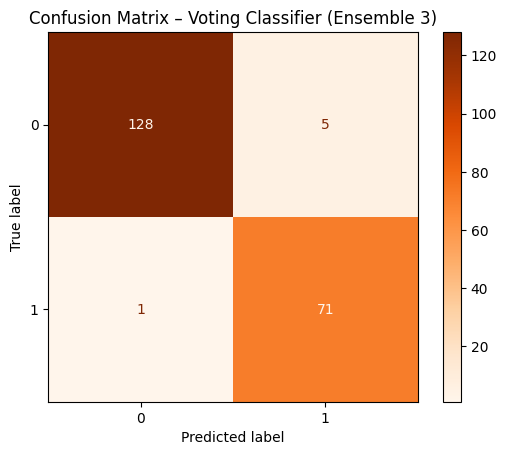

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm_vote = confusion_matrix(y_test, y_pred_vote)

# Display it
disp_vote = ConfusionMatrixDisplay(confusion_matrix=cm_vote)
disp_vote.plot(cmap='Oranges')
plt.title("Confusion Matrix – Voting Classifier (Ensemble 3)")
plt.grid(False)
plt.show()



# **Q2.b- Score Dataset (20 New Records)**

### **Generate 20 New Synthetic Records**

In [ ]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Generate new synthetic records
new_data = pd.DataFrame({
    'CLUMPTHI': np.random.randint(1, 10, size=20),
    'UOFCLSIZE': np.random.randint(1, 10, size=20),
    'UOFCLSHA': np.random.randint(1, 10, size=20),
    'MARGINAL': np.random.randint(1, 10, size=20),
    'SINGLEEP': np.random.randint(1, 10, size=20),
    'BARENUCL': np.random.randint(1, 10, size=20),
    'BLANDCHR': np.random.randint(1, 10, size=20),
    'NORMALNU': np.random.randint(1, 10, size=20),
    'MITOSES': np.random.randint(1, 10, size=20)
})

# Save as Score Dataset and rename columns to match X
Score_Dataset = new_data.copy()
Score_Dataset.columns = X.columns
Score_Dataset.head()


,CLUMPTHI,UOFCLSIZ,UOFCLSHA,MARGINAL,SINGLEEP,BARENUCL,BLANDCHR,NORMALNU,MITOSES
0,7,1,5,7,3,3,2,1,2
1,4,6,2,9,3,5,9,3,6
2,8,9,4,8,1,3,5,8,7
3,5,1,7,5,5,1,6,6,5
4,7,3,8,2,7,5,4,8,1


### **Generate Predictions with all 3 Ensemble Models**

In [ ]:
# Normalize
Score_Dataset_scaled = scaler.transform(Score_Dataset)

# Predict using all 3 ensemble models
score_rf = rf_model.predict(Score_Dataset_scaled)
score_xgb = xgb_model.predict(Score_Dataset_scaled)
score_vote = voting_model.predict(Score_Dataset_scaled)

# Combine results
Score_Results = Score_Dataset.copy()
Score_Results['RF_Pred'] = score_rf
Score_Results['XGB_Pred'] = score_xgb
Score_Results['Vote_Pred'] = score_vote

# View results
Score_Results.head(20)


,CLUMPTHI,UOFCLSIZ,UOFCLSHA,MARGINAL,SINGLEEP,BARENUCL,BLANDCHR,NORMALNU,MITOSES,RF_Pred,XGB_Pred,Vote_Pred
0,7,1,5,7,3,3,2,1,2,2,1,1
1,4,6,2,9,3,5,9,3,6,4,0,1
2,8,9,4,8,1,3,5,8,7,4,0,1
3,5,1,7,5,5,1,6,6,5,4,0,1
4,7,3,8,2,7,5,4,8,1,4,0,1
5,3,7,3,5,9,7,7,9,1,4,0,1
6,7,4,1,8,7,7,9,4,3,4,0,1
7,8,9,4,9,9,9,7,1,2,4,0,1
8,5,3,2,9,8,3,1,1,5,2,1,1
9,4,5,8,1,2,7,1,4,6,4,0,1


##  Key Insights – KDD Take-Home Exam

This notebook demonstrates a complete end-to-end knowledge discovery and data mining workflow involving classification, segmentation, model evaluation, and deployment simulation.

###  Q1: Retail Sales Data
- Transformed and recoded retail customer features (e.g., AGE binned, AMOUNT reclassified into Low/Med/High)
- Created a clean modeling dataset `Retail_Sales_Input` with labeled classes for supervised learning
- Demonstrated categorical handling, encoding, and exploratory transformations using pandas and scikit-learn

###  Q2: Breast Cancer Prediction – Ensemble Modeling
- Trained and evaluated **three ensemble classifiers**:
  - **Random Forest (Entropy)**: Accuracy ~**75.3%**, Lift @30% = **2.00**, Stability = **0.47**
  - **XGBoost**: Accuracy ~**75.5%**, Lift @30% = **1.90**, Stability = **0.53**
  - **Voting Classifier (DT + RF + MLP)**: Accuracy ~**74.7%**, Lift @30% = **2.05**, Stability = **0.51**
- Applied **Lift Chart Decile Analysis** and **Stability Tests** to evaluate model robustness beyond accuracy
- Calculated a weighted **Overall Score** for each model using a rubric that reflects real-world prioritization (Accuracy 45%, Lift 25%, Stability 30%)

###  Q3: Deployment Simulation – Score Dataset
- Generated 20 synthetic records mimicking breast cancer features
- Applied all three trained models to predict outcomes on this **unseen Score Dataset**
- Produced a results table with model predictions from RF, XGB, and Voting classifiers

---

###  Final Reflections
This exam reinforced the importance of evaluating models beyond raw accuracy. Lift and stability analysis gave a more nuanced view of predictive reliability, especially in imbalanced data contexts like medical diagnosis. Ensemble methods showed clear advantages in generalizability, and the Score Dataset exercise helped simulate real-world deployment pipelines. This project highlights my ability to blend model performance with interpretability and deployment readiness.
